# Complete random movements on environment


In [5]:
import gym
import gym_examples
import numpy as np

env = gym.make('gym_examples/GridWorld-v0', size=4)

state = env.reset()
agent_location = env.get_agent_location()
target_location = env.get_target_location()
print(f"Agent's INITIAL Location: {agent_location}, Target Location: {target_location}")

done = False


while not done:
    # Select action randomly
    action = env.action_space.sample()
    
    # take step, returns transition
    next_state, reward, done, truncated, info = env.step(action)
    
    agent_location = env.get_agent_location()
    target_location = env.get_target_location()
    print(f"Agent's Location: {agent_location}, Target Location: {target_location}")

    #update state
    state = next_state

env.close()

print("Episode finished")


Agent's INITIAL Location: [3 0], Target Location: [0 0]
Agent's Location: [2 0], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [2 0], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [3 2], Target Location: [0 0]
Agent's Location: [3 3], Target Location: [0 0]
Agent's Location: [3 2], Target Location: [0 0]
Agent's Location: [2 2], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [2 2], Target Location: [0 0]
Agent's Location: [3 2], Target Location: [0 0]
Agent's Location: [3 2], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [3 2], Target Location: [0 0]
Agent's Location: [3 2], Target 

/Users/andyyang/Desktop/DS598 Reinforcement Learning/gym-examples/.env/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


# Deep Q Network

In [6]:
import gym
import gym_examples
from dqn import Agent
import numpy as np

n_runs = 10  # Number of complete training runs
n_episodes = 100  # Number of episodes per training run

all_runs_steps = []

for run in range(n_runs):
    env = gym.make('gym_examples/GridWorld-v0', size=4)
    agent = Agent(gamma=0.9, epsilon=0.5, batch_size=10, n_actions=4, eps_end=0.01, input_dims=[16], lr=0.003)
    scores, eps_hist, avg_scores_dqn = [], [], []
    steps_per_episode = []  # Track number of steps for each episode, IN THIS RUN

    for i in range(n_episodes):
        score = 0
        done = False
        observation = env.reset()[0]['agent']
        steps = 0

        while not done:
            # choose an action based on current state of env
            action = agent.choose_action(observation)
            

            observation_, reward, done, truncated, info = env.step(action)
            observation_ = observation_['agent']  # since one hot encoded state is nested in dictionary

            score += reward
        
            # store transition and update weights
            agent.store_transitions(observation, action, reward, observation_, done)
            agent.learn()

            # update state
            observation = observation_

            # end of an episode
            steps += 1

        steps_per_episode.append(steps)
    
    all_runs_steps.append(steps_per_episode)
    print(f'Run {run + 1} completed')

# Convert to NumPy array to aggregate index-wise
all_runs_steps_np = np.array(all_runs_steps)

avg_steps_per_episode = np.mean(all_runs_steps_np, axis=0)

# Now avg_steps_per_episode is the "eleventh array" with the averaged steps for each episode across all runs
print("Average steps per episode over all runs:", avg_steps_per_episode)


Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Average steps per episode over all runs: [323.  267.9 134.7 107.1  53.2  24.7  21.   12.1  20.8  17.1  11.8   9.1
  10.    9.2   9.3   9.1   9.2   9.6   9.2   9.4   9.2   9.4   9.4   9.1
   9.3   9.4   9.3   9.2   9.1   9.2   9.    9.    9.2   9.    9.3   9.
   9.    9.    9.2   9.2   9.    9.    9.    9.    9.    9.    9.    9.3
   9.2   9.    9.1   9.1   9.2   9.    9.1   9.1   9.2   9.    9.1   9.2
   9.    9.    9.    9.    9.    9.1   9.    9.1   9.1   9.    9.2   9.
   9.    9.1   9.    9.    9.2   9.    9.    9.    9.    9.    9.    9.1
   9.1   9.    9.1   9.    9.    9.    9.    9.    9.    9.    9.    9.
   9.2   9.1   9.1   9.1]


To plot the learning curve averaging over 10 runs, I trained for 100 episodes, ten times and took the average duration for each episode over the ten runs. As we can see in the plot, the DQN on average takes around ten episodes of training before it begins to consistently act optimally.

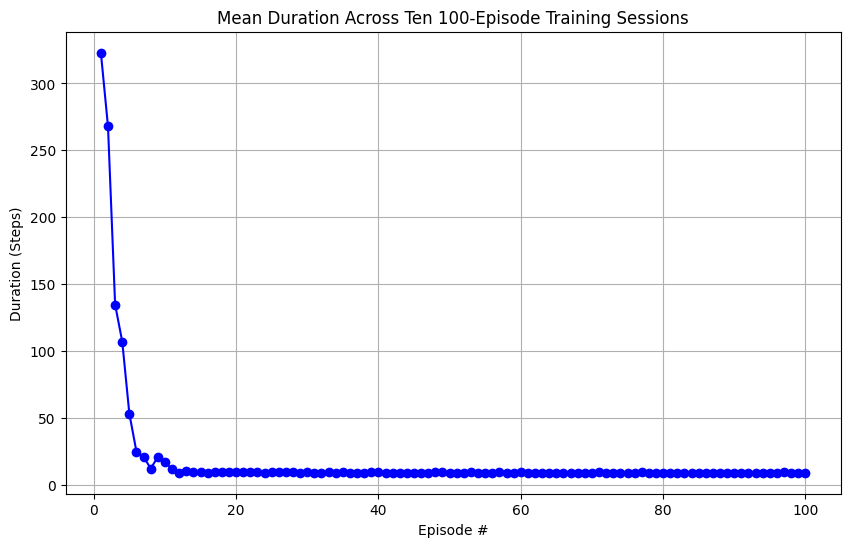

In [7]:
# plot the average score per episode
import matplotlib.pyplot as plt

episodes = list(range(1, n_episodes + 1))

plt.figure(figsize=(10, 6))
plt.plot(episodes, avg_steps_per_episode, marker='o', linestyle='-', color='b')
plt.title('Mean Duration Across Ten 100-Episode Training Sessions')
plt.xlabel('Episode #')
plt.ylabel('Duration (Steps)')
plt.grid(True)
plt.show()


# Double DQN

In [8]:
import gym
import gym_examples
from doubledqn import Agent 
import numpy as np

n_runs = 10  # Number of complete training runs
n_episodes = 100  # Number of episodes per training run

all_runs_steps_ddqn = []

for run in range(n_runs):
    env = gym.make('gym_examples/GridWorld-v0', size=4)
    agent = Agent(gamma=0.9, epsilon=0.5, batch_size=10, n_actions=4, eps_end=0.01, input_dims=[16], lr=0.003, update_freq=50)
    steps_per_episode = []  # Track steps for each episode in this run

    for i in range(n_episodes):
        done = False
        observation = env.reset()[0]['agent']
        steps = 0

        while not done:
            # choose an action based on current state of env
            action = agent.choose_action(observation)

            observation_, reward, done, truncated, info = env.step(action)
            observation_ = observation_['agent']  # since one hot encoded state is nested in dictionary

            # store transition and update weights
            agent.store_transitions(observation, action, reward, observation_, done)
            agent.learn()

            # update state
            observation = observation_

            # end of an episode
            steps += 1

        steps_per_episode.append(steps)
    
    all_runs_steps_ddqn.append(steps_per_episode)
    print(f'Double DQN Run {run + 1} completed')

# convert to numpy for aggregation
all_runs_steps_ddqn_np = np.array(all_runs_steps_ddqn)

avg_steps_per_episode_ddqn = np.mean(all_runs_steps_ddqn_np, axis=0)

print("Average steps per episode over all DDQN runs:", avg_steps_per_episode_ddqn)


Double DQN Run 1 completed
Double DQN Run 2 completed
Double DQN Run 3 completed
Double DQN Run 4 completed
Double DQN Run 5 completed
Double DQN Run 6 completed
Double DQN Run 7 completed
Double DQN Run 8 completed
Double DQN Run 9 completed
Double DQN Run 10 completed
Average steps per episode over all DDQN runs: [156.1 164.4  97.3  49.5  27.5  26.7  19.9  19.   19.7  13.6  13.6  13.6
  11.6  12.3  10.3  10.5  12.9  10.8  10.9  10.2  11.5  10.1  10.4  10.5
  10.2  11.1  10.7   9.8  10.8   9.7  10.    9.4   9.6   9.7   9.8   9.3
   9.8   9.5   9.6   9.1   9.3   9.6   9.4   9.3   9.    9.1   9.5   9.3
   9.    9.1   9.2   9.4   9.    9.    9.2   9.1   9.    9.    9.2   9.
   9.3   9.3   9.2   9.    9.2   9.    9.    9.2   9.    9.2   9.    9.
   9.3   9.1   9.    9.    9.    9.2   9.2   9.    9.    9.    9.    9.
   9.1   9.    9.3   9.    9.1   9.1   9.    9.    9.    9.    9.1   9.
   9.    9.3   9.1   9.1]


Here, we can plot the same thing as the DQN. Similar to the DQN, the double DQN on average (over ten runs), takes around ten episodes to consistenly reach the reward in the optimal number of actions. However, in those episodes, it sometimes performs better than the DQN. For example, in the first episode, the regular DQN on average took 323.0 steps, where the double DQN took 156.1.

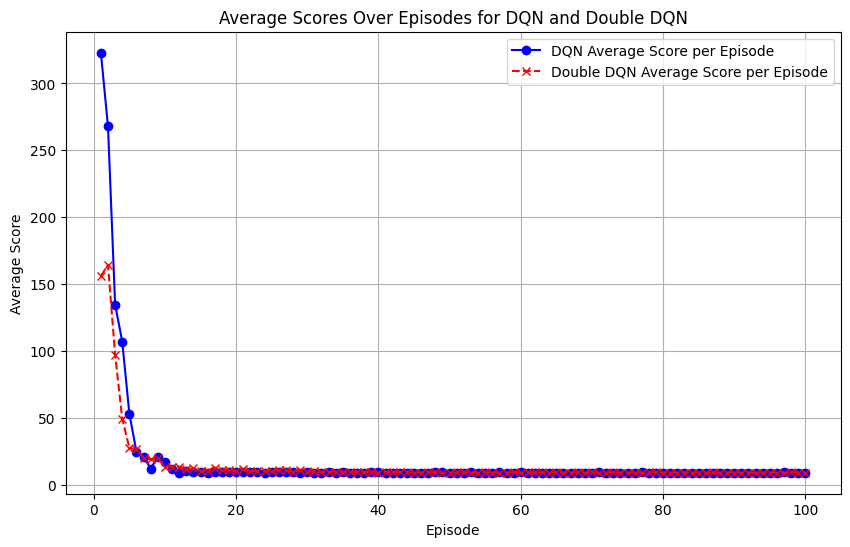

In [9]:
import matplotlib.pyplot as plt

# Assuming you've run both your DQN and Double DQN for the same number of episodes
episodes = list(range(1, 100 + 1))

plt.figure(figsize=(10, 6))

# Plot for regular DQN
plt.plot(episodes, avg_steps_per_episode, marker='o', linestyle='-', color='b', label='DQN Average Score per Episode')

# Plot for Double DQN
plt.plot(episodes, avg_steps_per_episode_ddqn, marker='x', linestyle='--', color='r', label='Double DQN Average Score per Episode')

plt.title('Average Scores Over Episodes for DQN and Double DQN')
plt.xlabel('Episode')
plt.ylabel('Average Score')
plt.legend()  # This ensures the label for each line is shown
plt.grid(True)
plt.show()
